In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [61]:
# DATA COLLECTION

In [62]:
df=pd.read_csv("stock.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-26,52.900002,53.180000,51.919998,52.950001,52.257160,106400
1,2021-11-29,53.130001,53.259998,51.020000,51.150002,50.480717,160300
2,2021-11-30,51.000000,52.599998,50.810001,51.740002,51.062996,325400
3,2021-12-01,52.669998,53.430000,52.000000,52.070000,51.388676,200100
4,2021-12-02,52.080002,54.299999,52.040001,53.880001,53.174992,168100


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [64]:
# DATA PREPROCESSING

In [65]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot: >

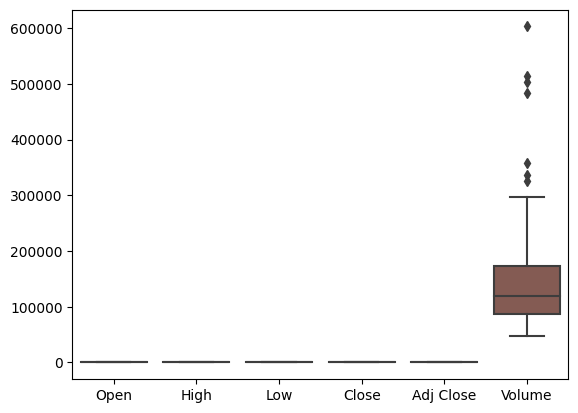

In [66]:
sns.boxplot(df)

In [67]:
Q1=np.percentile(df["Volume"],25,interpolation="midpoint")
Q3=np.percentile(df["Volume"],75,interpolation="midpoint")

IQR=Q3-Q1

upper=np.where(df["Volume"]>=(Q3+1.5*IQR))
lower=np.where(df["Volume"]<=(Q1-1.5*IQR))

print(upper)
print(lower)

df.drop(upper[0],inplace=True,axis=0)
df.drop(lower[0],inplace=True,axis=0)


(array([  2,  14,  15,  16, 144, 167, 231], dtype=int64),)
(array([], dtype=int64),)


C:\Users\subha\AppData\Local\Temp\ipykernel_6128\3866208832.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(df["Volume"],25,interpolation="midpoint")
C:\Users\subha\AppData\Local\Temp\ipykernel_6128\3866208832.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(df["Volume"],75,interpolation="midpoint")


<AxesSubplot: >

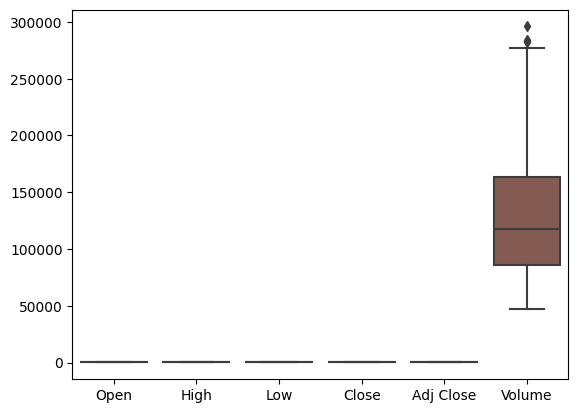

In [68]:
sns.boxplot(df)

In [69]:
# DATA ANALYSING

<bound method IndexOpsMixin.value_counts of 0      52.900002
1      53.130001
3      52.669998
4      52.080002
5      53.959999
         ...    
246    24.540001
247    25.209999
248    24.150000
249    23.980000
250    24.030001
Name: Open, Length: 244, dtype: float64>


<AxesSubplot: xlabel='Open', ylabel='count'>

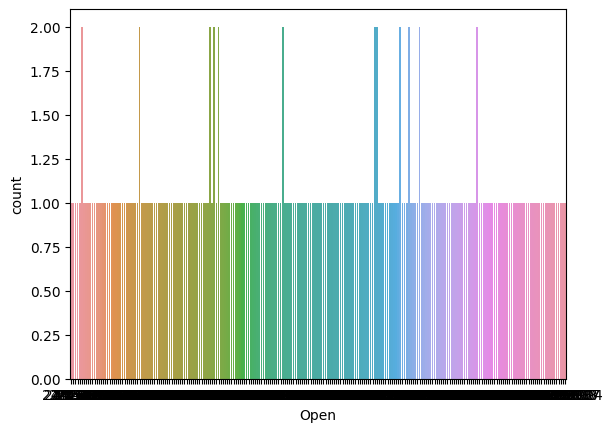

In [70]:

print(df["Open"].value_counts)
sns.countplot(x="Open",data=df,)

<bound method IndexOpsMixin.value_counts of 0      53.180000
1      53.259998
3      53.430000
4      54.299999
5      54.029999
         ...    
246    25.150000
247    25.209999
248    24.209999
249    24.309999
250    24.360001
Name: High, Length: 244, dtype: float64>


<AxesSubplot: xlabel='High', ylabel='count'>

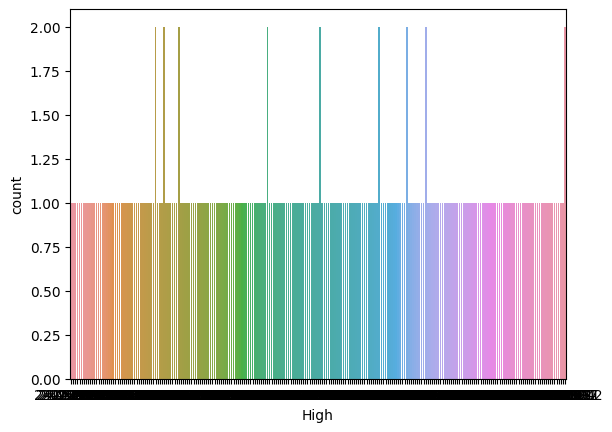

In [71]:
print(df["High"].value_counts)
sns.countplot(x="High",data=df,)

<bound method IndexOpsMixin.value_counts of 0      51.919998
1      51.020000
3      52.000000
4      52.040001
5      52.790001
         ...    
246    24.500000
247    23.910000
248    23.410000
249    23.660000
250    23.820000
Name: Low, Length: 244, dtype: float64>


<AxesSubplot: xlabel='Low', ylabel='count'>

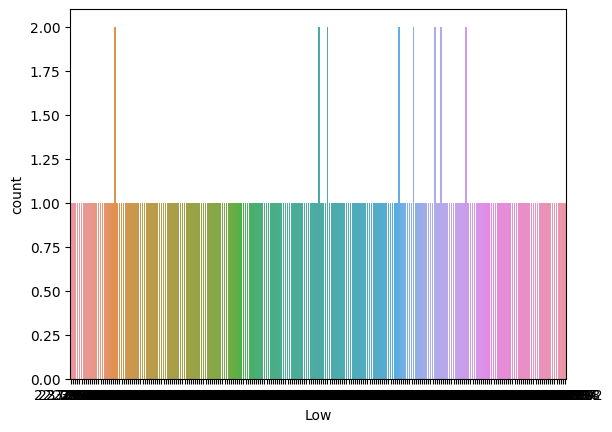

In [72]:
print(df["Low"].value_counts)
sns.countplot(x="Low",data=df,)

<bound method IndexOpsMixin.value_counts of 0      52.950001
1      51.150002
3      52.070000
4      53.880001
5      53.259998
         ...    
246    24.790001
247    24.070000
248    23.879999
249    23.950001
250    24.139999
Name: Close, Length: 244, dtype: float64>


<AxesSubplot: xlabel='Close', ylabel='count'>

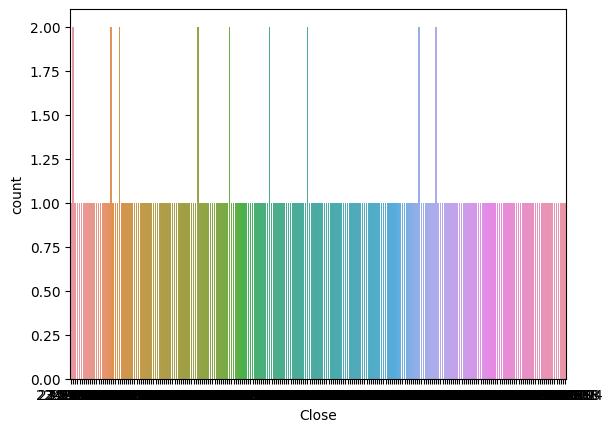

In [73]:
print(df["Close"].value_counts)
sns.countplot(x="Close",data=df,)

<bound method IndexOpsMixin.value_counts of 0      52.257160
1      50.480717
3      51.388676
4      53.174992
5      52.563099
         ...    
246    24.790001
247    24.070000
248    23.879999
249    23.950001
250    24.139999
Name: Adj Close, Length: 244, dtype: float64>


<AxesSubplot: xlabel='Adj Close', ylabel='count'>

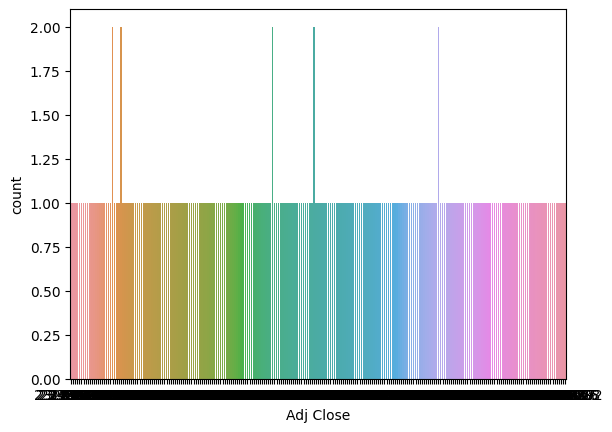

In [74]:
print(df["Adj Close"].value_counts)
sns.countplot(x="Adj Close",data=df,)

In [75]:
df.corr()

C:\Users\subha\AppData\Local\Temp\ipykernel_6128\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998610,0.997712,0.995636,0.995520,0.214730
High,0.998610,1.000000,0.998391,0.997936,0.997830,0.227289
Low,0.997712,0.998391,1.000000,0.998572,0.998564,0.201671
Close,0.995636,0.997936,0.998572,1.000000,0.999985,0.210339
Adj Close,0.995520,0.997830,0.998564,0.999985,1.000000,0.208539
Volume,0.214730,0.227289,0.201671,0.210339,0.208539,1.000000


In [76]:


x=df.iloc[:,np.r_[1,3:5]]
y=df.iloc[:,2]


In [77]:
# DIVIDING THE DATA INTO TRAIN AND TEST

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [79]:
# TRAINIGN THE MODEL

In [80]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train,y_train)


y_pred=model.predict(X_test)


In [81]:
# ACCURAY OF THE MODEL

In [82]:
from sklearn.metrics import mean_squared_error
print("Accuracy of the linear model: ")
print(np.sqrt(mean_squared_error(y_pred,y_test)))


Accuracy of the linear model: 
0.3629710522946205
